# Trafic Sign Recognition

We will build a deep neural network model that can classify traffic signs present in the image into different categories. With this model, we are able to read and understand traffic signs which are a very important task for all autonomous vehicles.

We'll go through the following steps:
1. Import the libraries
2. Visualize the dataset
3. Collecting the train dataset
4. Split the data into train and validation dataset
5. preprocessing the data
6. create the model classification using deep neural network
7. Predict the test dataset
8. Create the confusion matrix and classification report
9. create visualize the test datas set to check our model prediction

## Import Libraries

We'll import the libraries that we need to help us for building the model prediction. 

In [27]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
np.random.seed(10)

from matplotlib import style
style.use('fivethirtyeight')

## About Dataset

The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. We cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Our benchmark has the following properties:

- Single-image, multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike database

We can get the dataset from this kaggle link : https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

### Download The Dataset

In [ ]:
#load adast
! pip install kaggle

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
!unzip gtsrb-german-traffic-sign.zip

## Path Dataset

In [3]:
train_path = "/content/Train"
test_path = "/content/Test"

## Total Classes

In [4]:
df_meta = pd.read_csv('/content/Meta.csv')
df_meta = df_meta.sort_values(by="ClassId", ascending=True)
df_meta

,Path,ClassId,ShapeId,ColorId,SignId
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
13,Meta/2.png,2,1,0,3.29
23,Meta/3.png,3,1,0,3.29
34,Meta/4.png,4,1,0,3.29
38,Meta/5.png,5,1,0,3.29
39,Meta/6.png,6,1,3,3.3
40,Meta/7.png,7,1,0,3.29
41,Meta/8.png,8,1,0,3.29
42,Meta/9.png,9,1,0,3.25


In [5]:
path = ["/content/" + meta_path for meta_path in df_meta['Path'].map(str)]
path

['/content/Meta/0.png',
 '/content/Meta/1.png',
 '/content/Meta/2.png',
 '/content/Meta/3.png',
 '/content/Meta/4.png',
 '/content/Meta/5.png',
 '/content/Meta/6.png',
 '/content/Meta/7.png',
 '/content/Meta/8.png',
 '/content/Meta/9.png',
 '/content/Meta/10.png',
 '/content/Meta/11.png',
 '/content/Meta/12.png',
 '/content/Meta/13.png',
 '/content/Meta/14.png',
 '/content/Meta/15.png',
 '/content/Meta/16.png',
 '/content/Meta/17.png',
 '/content/Meta/18.png',
 '/content/Meta/19.png',
 '/content/Meta/20.png',
 '/content/Meta/21.png',
 '/content/Meta/22.png',
 '/content/Meta/23.png',
 '/content/Meta/24.png',
 '/content/Meta/25.png',
 '/content/Meta/26.png',
 '/content/Meta/27.png',
 '/content/Meta/28.png',
 '/content/Meta/29.png',
 '/content/Meta/30.png',
 '/content/Meta/31.png',
 '/content/Meta/32.png',
 '/content/Meta/33.png',
 '/content/Meta/34.png',
 '/content/Meta/35.png',
 '/content/Meta/36.png',
 '/content/Meta/37.png',
 '/content/Meta/38.png',
 '/content/Meta/39.png',
 '/content

## Classes Visualize

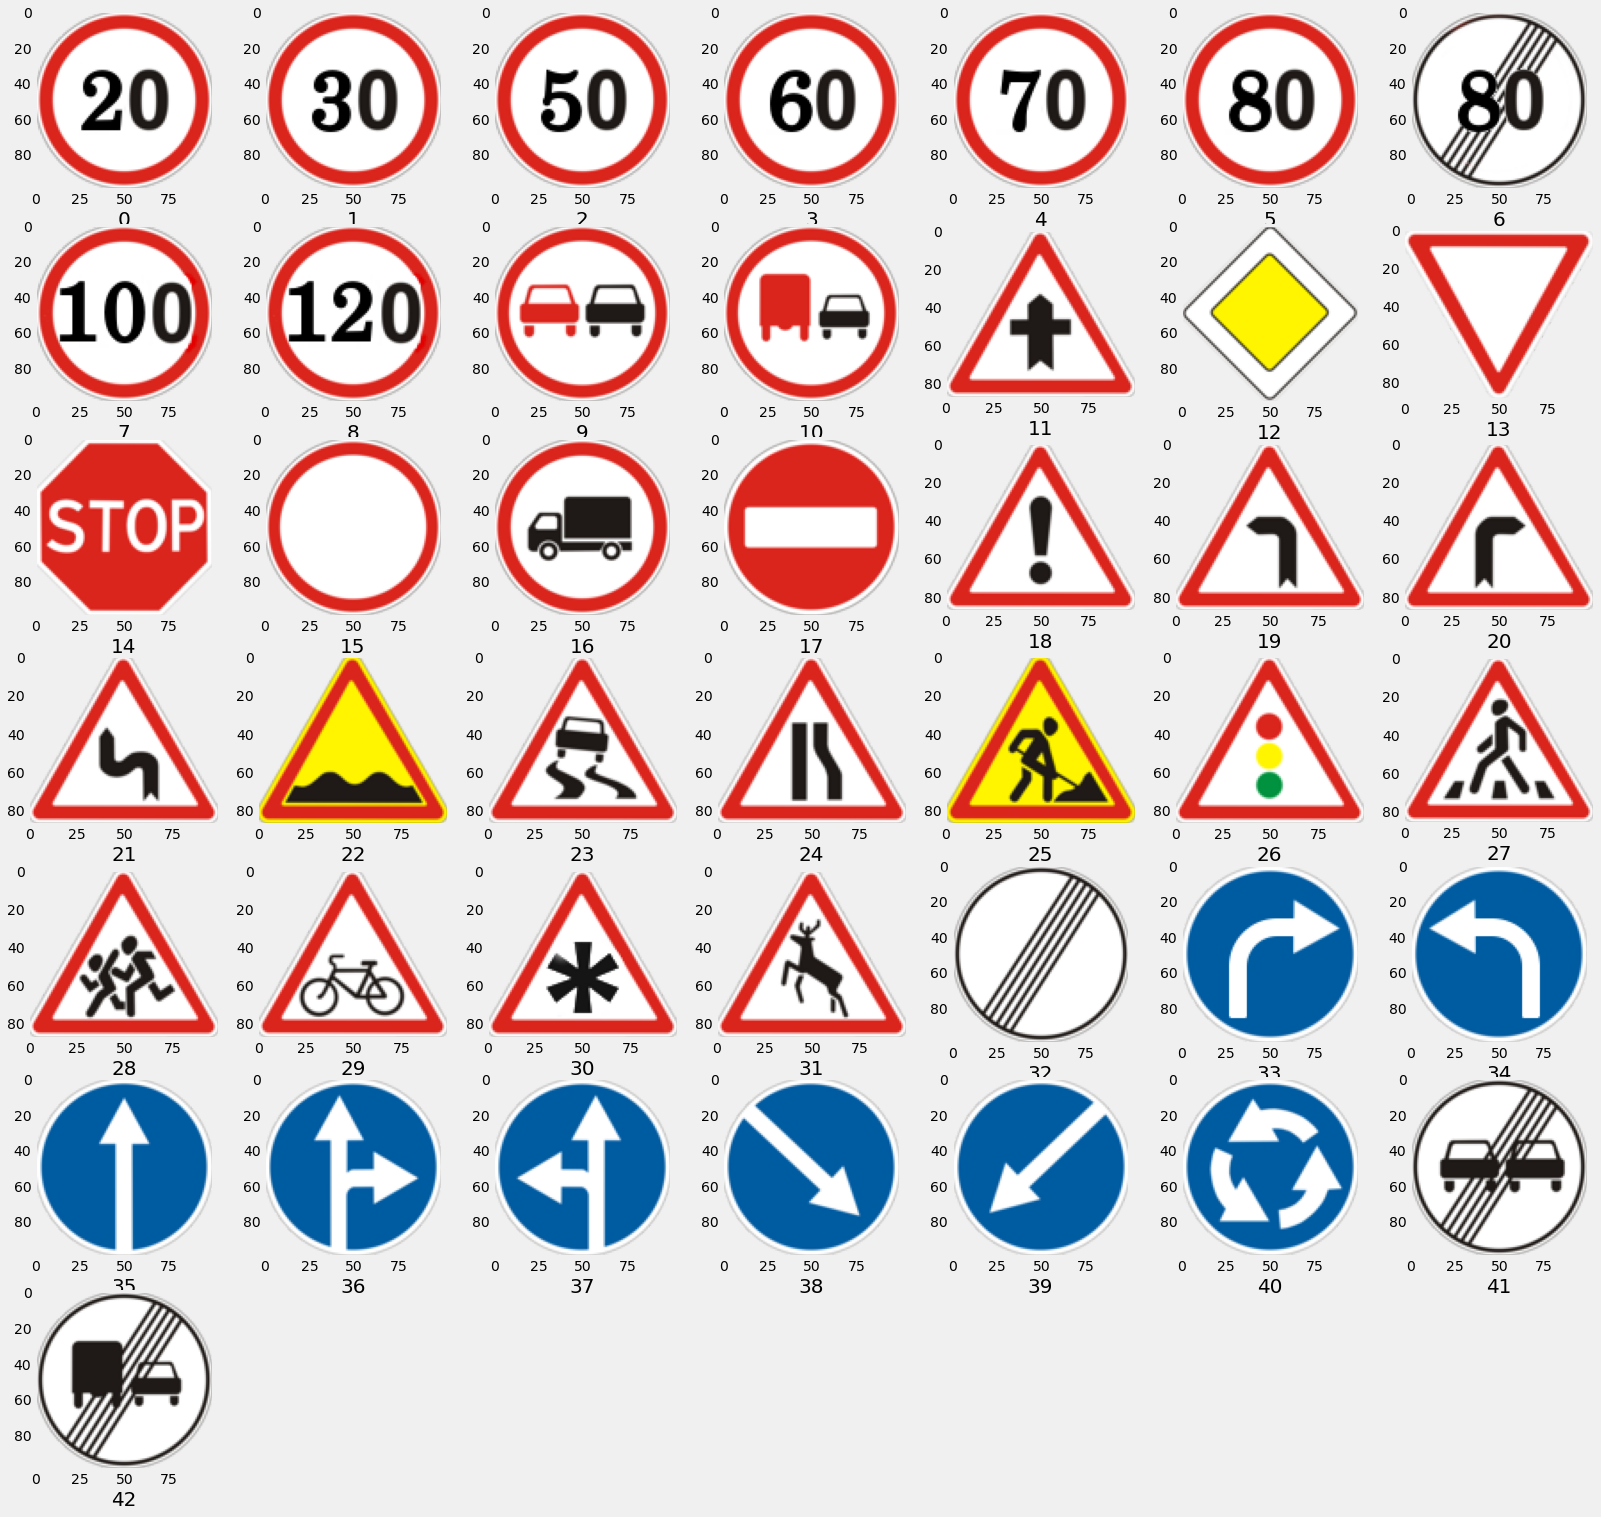

In [6]:
from matplotlib.image import imread
plt.figure(figsize=(25,25))

for i in range(0, 43):
    plt.subplot(7,7,i+1)
    img_path = path[i]
    rand_img = imread(img_path)
    plt.imshow(rand_img)
    plt.grid(False)
    plt.xlabel(i, fontsize = 20)
    plt.xticks()

In [7]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

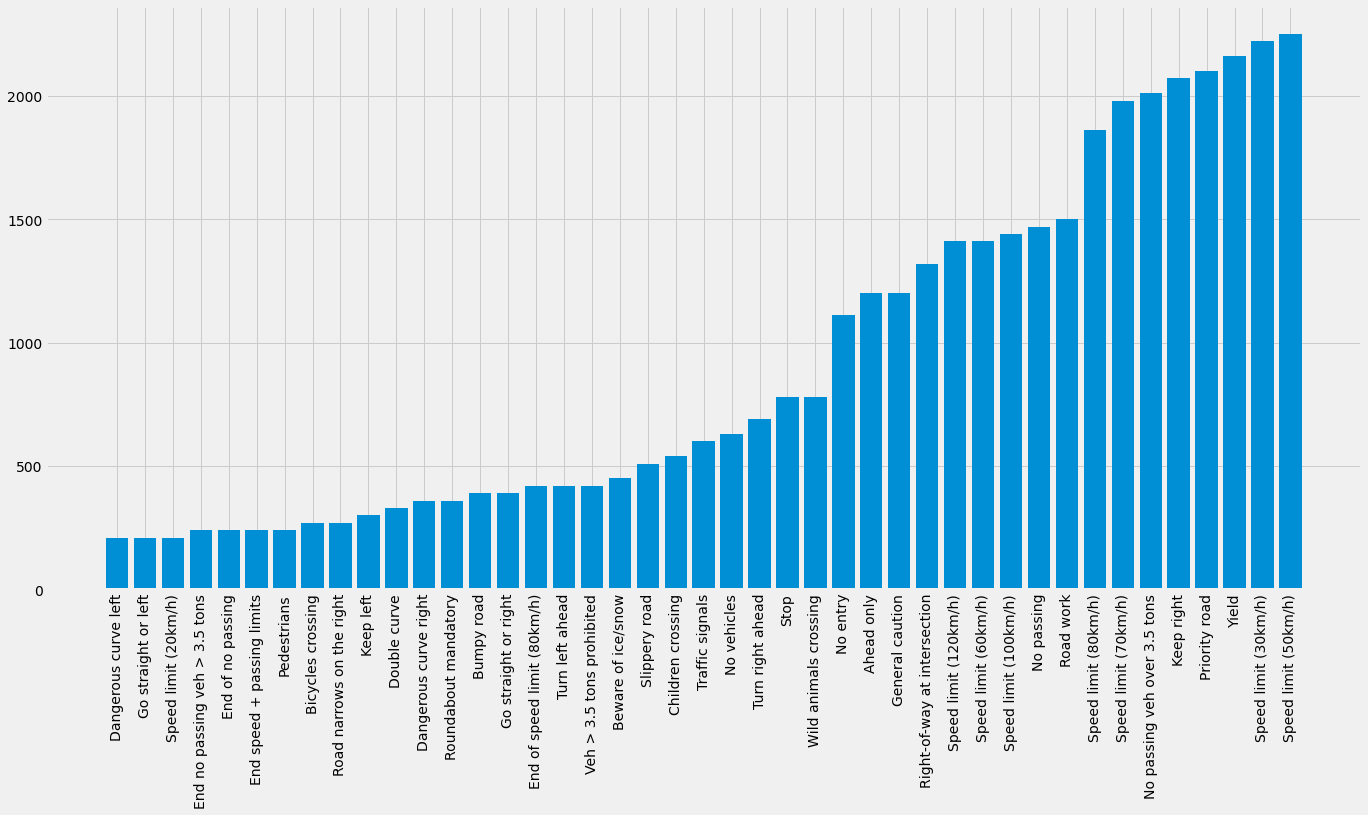

In [8]:
dirs_train = os.listdir(train_path)
train_num = []
class_num = []

for dir in dirs_train:
  train_files = os.listdir(train_path + "/" + dir)
  train_num.append(len(train_files))
  class_num.append(classes[int(dir)])

zipped_lists = zip(train_num, class_num)
sorted = sorted(zipped_lists)
tuples = zip(*sorted)
train_num, class_num = [list(tuple) for tuple in tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_num)
plt.xticks(class_num, rotation='vertical')
plt.show()

## Collecting Train Data

In [9]:
num_categories = len(os.listdir(train_path))
num_categories

43

In [10]:
# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

data_img = []
label_img = []

for i in range(num_categories):
  path = train_path + "/" + str(i)
  images = os.listdir(path)

  for img in images:
    try:
      image = cv2.imread(path + '/' + img)
      image_fromarray = Image.fromarray(image, 'RGB')
      resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
      data_img.append(np.array(resize_image))
      label_img.append(i)
    
    except:
      print("Error loading image in "+img)

# Changing the list to numpy array
image_data = np.array(data_img)
image_labels = np.array(label_img)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


## Split The data

In [11]:
# Splitting the data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, stratify=image_labels)
X_train = X_train/255.
X_val = X_val/255.

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


## Preprocessing the data (prepare it for a model)

In [12]:
y_train = tf.keras.utils.to_categorical(y_train, num_categories)
y_val = tf.keras.utils.to_categorical(y_val, num_categories)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [17]:
#set up data augmentation
train_datagen = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   shear_range=0.15,
                                   zoom_range=0.15,
                                   horizontal_flip=False,
                                   vertical_flip=False,
                                   fill_mode="nearest")

train_augmented = train_datagen.flow(X_train, y_train, batch_size=32)


## Create a model

In [13]:
# Creating model architecture
model = tf.keras.models.Sequential([
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation="relu", input_shape=(IMG_HEIGHT, IMG_WIDTH, channels)),
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.BatchNormalization(axis=-1),

    layers.Conv2D(filters = 64, kernel_size=(3,3), activation="relu", input_shape=(IMG_HEIGHT, IMG_WIDTH, channels)),
    layers.Conv2D(filters = 64, kernel_size=(3,3), activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.BatchNormalization(axis=-1),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(rate=0.2),

    layers.Dense(num_categories, activation="softmax")
])

# Compile the model
model.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ['accuracy'])

In [15]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 64)          3

In [16]:
# Create checkpoint callback to save model 
checkpoint_path = "trafic_sign_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True, 
                                                         monitor="val_accuracy", 
                                                         save_best_only=True)

## Fit The Model

In [18]:
# Fit the model
history_1 = model.fit(train_augmented,
                      epochs=30,
                      steps_per_epoch=len(train_augmented),
                      validation_data=(X_val, y_val),
                      callbacks=[checkpoint_callback])

Epoch 1/30
858/858 [==============================] - 26s 21ms/step - loss: 1.3011 - accuracy: 0.6258 - val_loss: 0.2224 - val_accuracy: 0.9299
Epoch 2/30
858/858 [==============================] - 17s 20ms/step - loss: 0.2753 - accuracy: 0.9152 - val_loss: 0.0653 - val_accuracy: 0.9799
Epoch 3/30
858/858 [==============================] - 18s 21ms/step - loss: 0.1726 - accuracy: 0.9462 - val_loss: 0.1120 - val_accuracy: 0.9628
Epoch 4/30
858/858 [==============================] - 17s 20ms/step - loss: 0.1326 - accuracy: 0.9590 - val_loss: 0.0518 - val_accuracy: 0.9849
Epoch 5/30
858/858 [==============================] - 17s 20ms/step - loss: 0.1040 - accuracy: 0.9666 - val_loss: 0.0431 - val_accuracy: 0.9872
Epoch 6/30
858/858 [==============================] - 17s 20ms/step - loss: 0.0944 - accuracy: 0.9707 - val_loss: 0.0545 - val_accuracy: 0.9843
Epoch 7/30
858/858 [==============================] - 17s 20ms/step - loss: 0.0918 - accuracy: 0.9717 - val_loss: 0.1098 - val_accuracy:

In [22]:
# Model evaluation
model.evaluate(X_val, y_val)

368/368 [==============================] - 1s 3ms/step - loss: 0.0134 - accuracy: 0.9969


[0.013382802717387676, 0.9968545436859131]

In [19]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title('Accuracy')
  plt.xlabel('epochs')
  plt.legend();

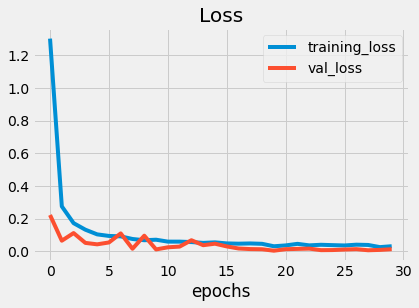

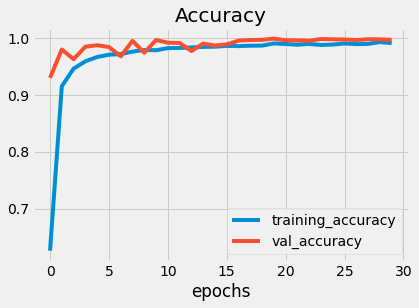

In [20]:
plot_loss_curves(history_1)

## Collectiong and Predict The Dataset

In [21]:
test = pd.read_csv('/content/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data_test = []

for i in imgs:
  try:
    image = cv2.imread('/content/' + i)
    image_fromarray = Image.fromarray(image, 'RGB')
    resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
    data_test.append(np.array(resize_image))
    
  except:
    print("Error loading image in "+ i)

X_test = np.array(data_test)
X_test = X_test/255.

predict_prob = model.predict(X_test)
predict_classes = predict_prob.argmax(axis=1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, predict_classes)*100)

395/395 [==============================] - 1s 2ms/step
Test Data accuracy:  97.47426761678543


## Confusion Matrix

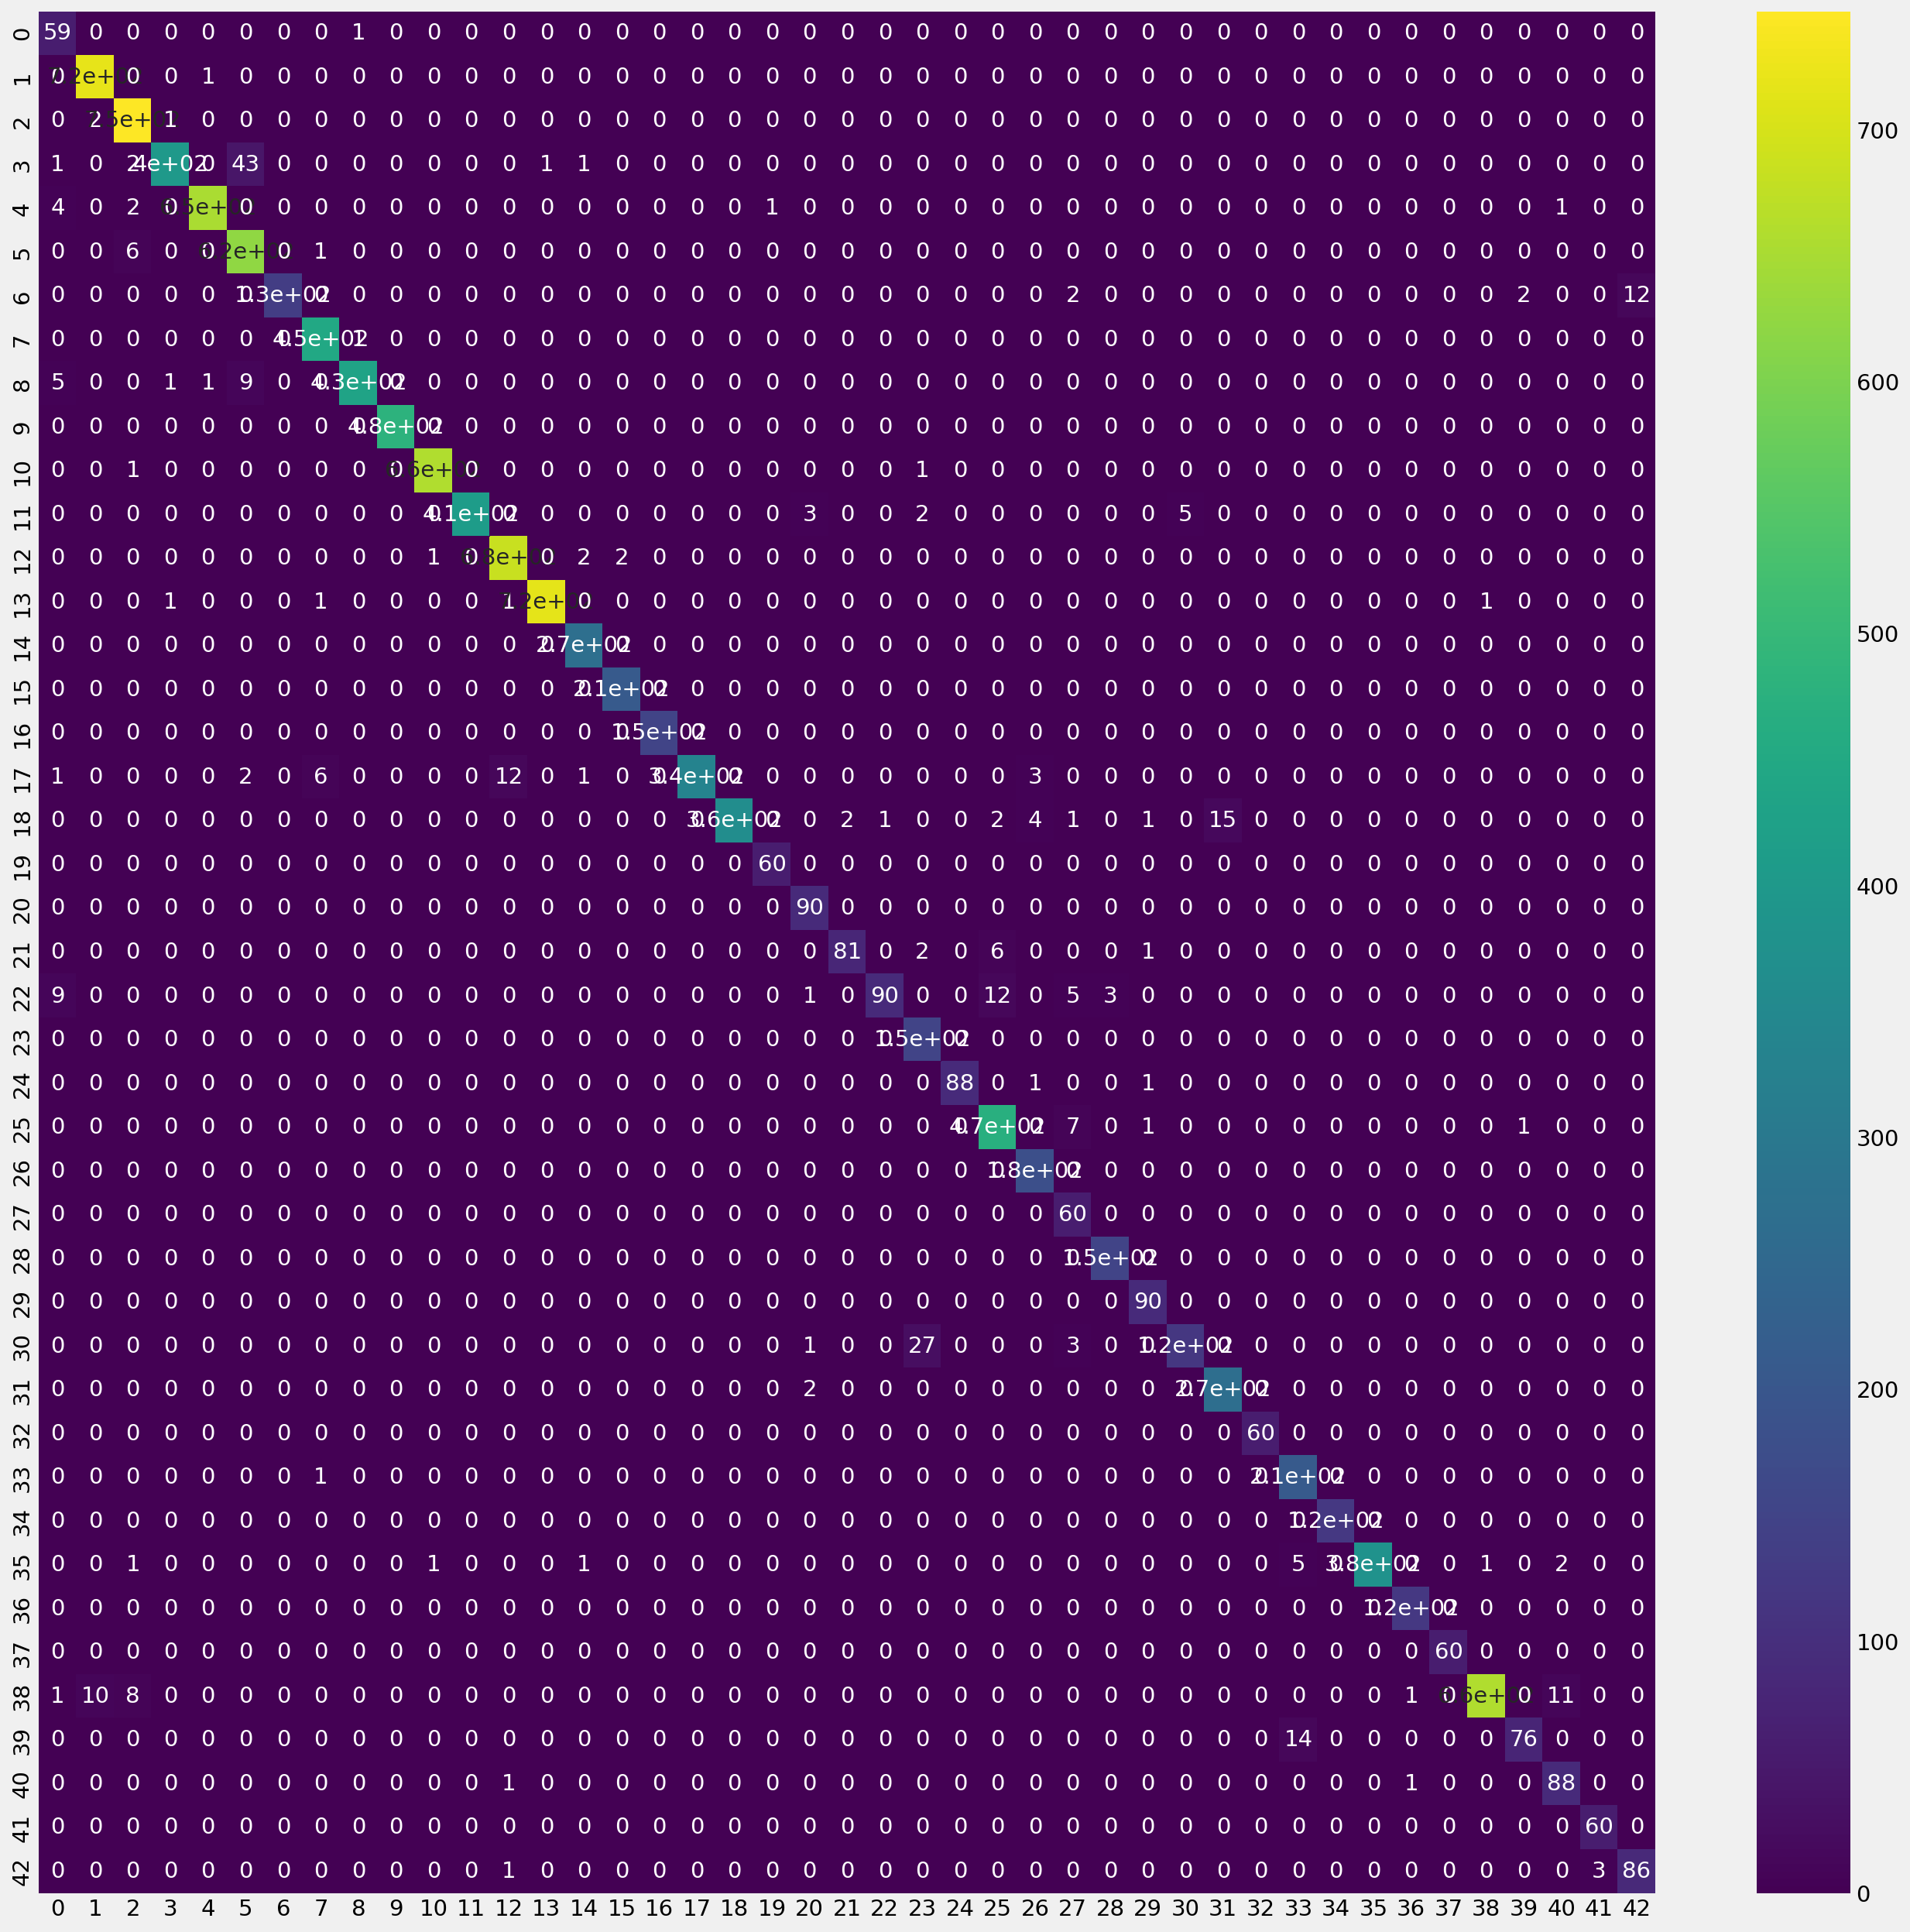

In [26]:
matrix = confusion_matrix(labels, predict_classes)

df_matrix = pd.DataFrame(matrix, index = classes,  columns = classes)
plt.figure(figsize = (20,20), dpi=150)
sns.heatmap(df_matrix, annot=True, cmap='viridis')

## Classification report

In [28]:
print(classification_report(labels, predict_classes))

              precision    recall  f1-score   support

           0       0.74      0.98      0.84        60
           1       0.98      1.00      0.99       720
           2       0.97      1.00      0.98       750
           3       0.99      0.89      0.94       450
           4       1.00      0.99      0.99       660
           5       0.92      0.99      0.95       630
           6       1.00      0.89      0.94       150
           7       0.98      1.00      0.99       450
           8       1.00      0.96      0.98       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       1.00      0.98      0.99       420
          12       0.98      0.99      0.99       690
          13       1.00      0.99      1.00       720
          14       0.98      1.00      0.99       270
          15       0.99      1.00      1.00       210
          16       1.00      1.00      1.00       150
          17       1.00    

## Visualize Test Data Predictions 

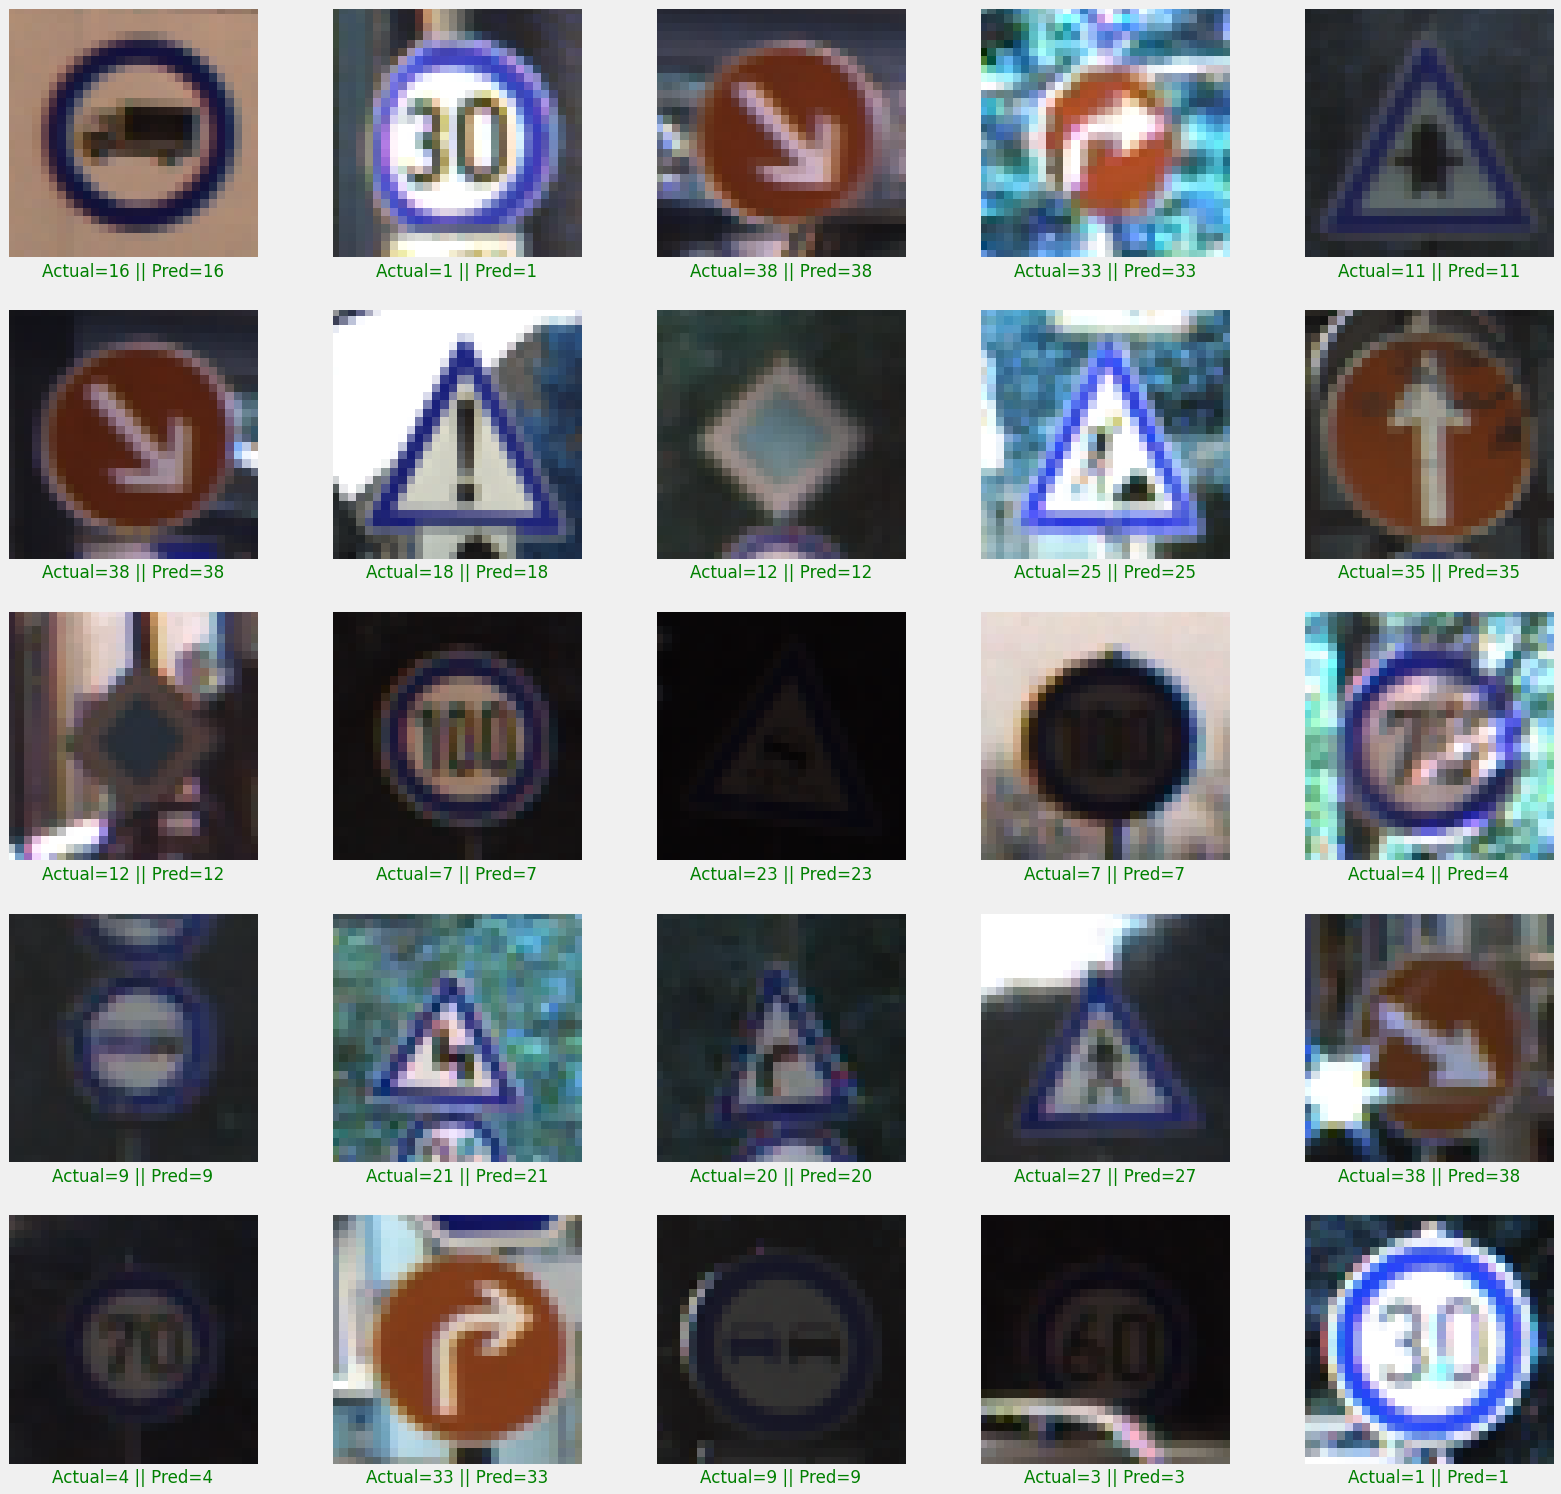

In [29]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = predict_classes[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()